### Student Information
Name: 張亞錫

Student ID: 112062530

GitHub ID: timothy0203

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Part 1

### **>>> Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [2]:
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [8]:
# Learn the vocabulary and return document-term matrix
vectorizer = CountVectorizer()
train_document_term_matrix = vectorizer.fit_transform(train_df.text)

# TOP30 Term Frequencies (Train data)
train_term_frequencies = []
train_counts_arr = train_document_term_matrix.sum(axis=0).tolist()[0]

for j in range(0, train_document_term_matrix.shape[1]):
    train_term_frequencies.append(train_counts_arr[j])

term_freq_df = pd.DataFrame(vectorizer.get_feature_names_out(), columns=['terms'])
term_freq_df['frequency'] = train_term_frequencies

# Sort
term_freq_df = term_freq_df.sort_values(by=['frequency'], ascending=False)

fig = px.bar(term_freq_df[:30], x=term_freq_df['terms'][:30], y=term_freq_df['frequency'][:30],
             title="TOP30 Term Frequencies (Train data)", labels={'x': 'Terms', 'y': 'Frequencies'})

fig.show()

In [7]:
# Learn the vocabulary and return document-term matrix
vectorizer = CountVectorizer()
test_document_term_matrix = vectorizer.fit_transform(test_df.text)

# TOP30 Term Frequencies (Test data)
test_term_frequencies = []
test_counts_arr = test_document_term_matrix.sum(axis=0).tolist()[0]

for j in range(0, test_document_term_matrix.shape[1]):
    test_term_frequencies.append(test_counts_arr[j])

test_term_freq_df = pd.DataFrame(vectorizer.get_feature_names_out(), columns=['terms'])
test_term_freq_df['frequency'] = test_term_frequencies

# Sort
test_term_freq_df = test_term_freq_df.sort_values(by=['frequency'], ascending=False)

fig = px.bar(test_term_freq_df[:30], x=test_term_freq_df['terms'][:30], y=test_term_freq_df['frequency'][:30],
             title="TOP30 Term Frequencies (Test data)", labels={'x': 'Terms', 'y': 'Frequencies'})

fig.show()

---
### **>>> Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

d:\ANACONDA\envs\DM_lab2\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [10]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [12]:
"😂" in feature_names_500

True

In [13]:
# Build analyzers (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()

# Apply analyzer to training data
tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])

# Check dimension
train_data_tfidf_features.shape

(3613, 10115)

In [14]:
train_data_tfidf_features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# observe some feature names
feature_names_500 = tfidf_vectorizer.get_feature_names_out()
feature_names_500[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

---
### **>>> Exercise 3 (Take home):**  
Can you interpret the results above? What do they mean?

In [17]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [53]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'joy', 'anger', 'joy', 'fear', 'joy', 'fear',
       'joy', 'anger'], dtype=object)

In [54]:
# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score,
print('train:')
print(classification_report(y_true=y_train, y_pred=y_train_pred))
print('test:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.68
train:
              precision    recall  f1-score   support

       anger       0.97      1.00      0.98       857
        fear       0.98      1.00      0.99      1147
         joy       1.00      1.00      1.00       823
     sadness       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613

test:
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [55]:
## check by confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [31]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

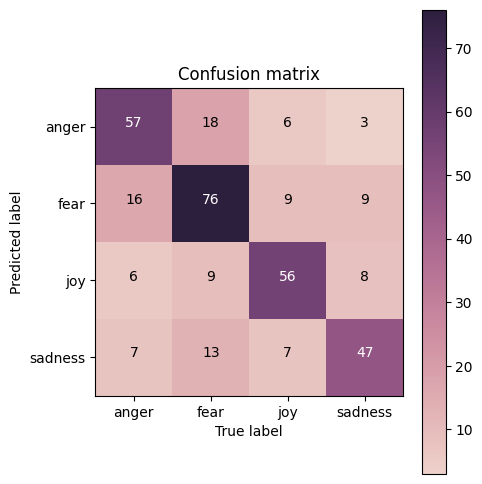

In [32]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

Answer to the Exercise 3

- Total "anger":

    - Correct predictions: 57 (anger predicted as anger)
    - Mispredicted as "fear": 18
    - Mispredicted as "joy": 6
    - Mispredicted as "sadness": 3
    - So, Total "anger" = 57 + 18 + 6 + 3 = 84

- Total "fear":

    - Mispredicted as "anger": 16
    - Correct predictions: 76 (fear predicted as fear)
    - Mispredicted as "joy": 9
    - Mispredicted as "sadness": 9
    - So, Total "fear" = 16 + 76 + 9 + 9 = 110

- Total "joy":

    - Mispredicted as "anger": 6
    - Mispredicted as "fear": 9
    - Correct predictions: 56 (joy predicted as joy)
    - Mispredicted as "sadness": 8
    - So, Total "joy" = 6 + 9 + 56 + 8 = 79

- Total "sadness":

    - Mispredicted as "anger": 7
    - Mispredicted as "fear": 13
    - Mispredicted as "joy": 7
    - Correct predictions: 47 (sadness predicted as sadness)
    - So, Total "sadness" = 7 + 13 + 7 + 47 = 74

---
### **>>> Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

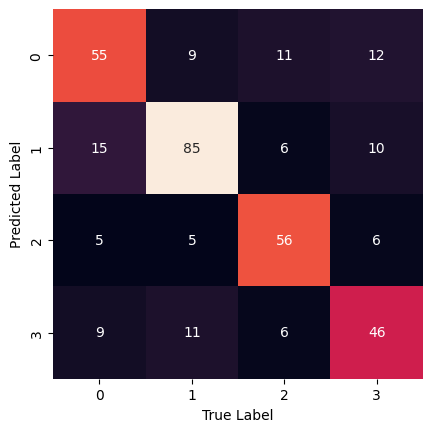

In [49]:
# Answer
# Training
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict
y_train_pred = naive_bayes_classifier.predict(X_train)
y_test_pred = naive_bayes_classifier.predict(X_test)

# Confusion Matrix Plot
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [50]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print('train:')
print(classification_report(y_true=y_train, y_pred=y_train_pred))
print('test:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.7
train:
              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613

test:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### **>>> Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

1. The Decision Tree selects attributes at each step by minimizing entropy, aiming to find criteria that perfectly classify the training data. However, when the tree becomes too deep, it can lead to overfitting, making it challenging to generalize to other datasets.

2. In contrast, Naive Bayes classifies based on the calculation principle that "the higher the probability of an event supporting a certain attribute occurring in the data, the greater the likelihood of that attribute being true." Despite making assumptions (that all attributes are mutually independent) and neglecting the interaction between attributes, resulting in bias in the models, Naive Bayes indirectly becomes less prone to overfitting.

3. When comparing the accuracies of the two models, it becomes evident that the Decision Tree may encounter overfitting issues(train acc: 0.99 >> test acc: 0.68), while Naive Bayes is less susceptible to this problem(train acc: 0.79 >> test acc: 0.7). This difference might be a reason why Naive Bayes outperforms the Decision Tree in training accuracy.

---
### **>>> Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [58]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [59]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3097    sadness
3416    sadness
402       anger
1038       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [60]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [74]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [75]:
from keras.callbacks import CSVLogger
from matplotlib import pyplot as plt

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

print('training finish')

Epoch 1/25


113/113 [==============================] - 1s 4ms/step - loss: 1.3176 - accuracy: 0.3905 - val_loss: 1.2551 - val_accuracy: 0.4524
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9653 - accuracy: 0.6535 - val_loss: 0.8912 - val_accuracy: 0.6715
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7935 - val_loss: 0.7982 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8505 - val_loss: 0.7606 - val_accuracy: 0.6744
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8898 - val_loss: 0.8148 - val_accuracy: 0.7032
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2600 - accuracy: 0.9123 - val_loss: 0.8489 - val_accuracy: 0.6772
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9308 - val_loss: 0.9080 - val_accuracy: 0.6801
Epoch 8/25
113/11

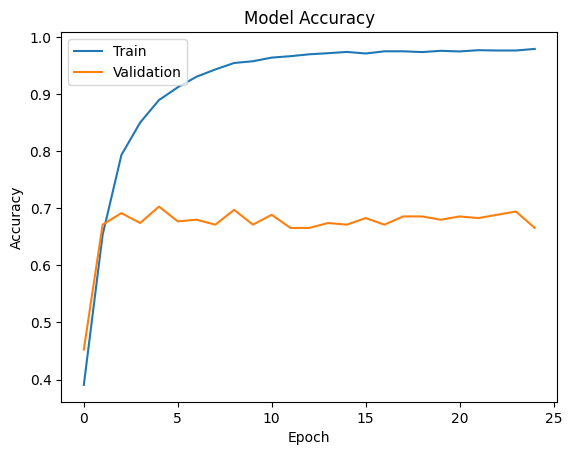

In [76]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


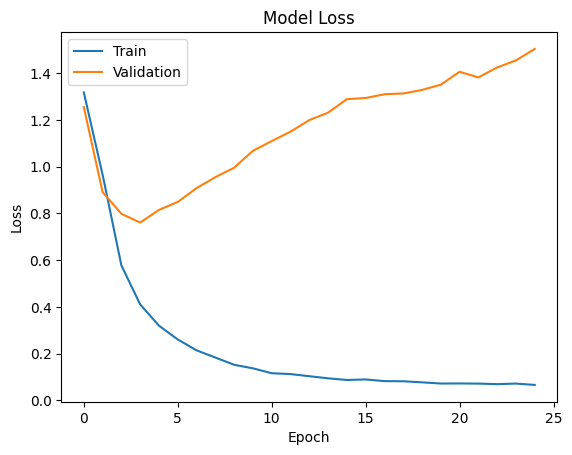

In [77]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Answer:

1. For accuracy, training curve is converge to > 0.9, which claim that the model didn't underfit
2. For loss, the validation curve is increase around 3~4 epoch, which means the model is getting overfit

---
### **>>> Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [78]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3097,40270,"One step forward, two steps backward, the link...","[One, step, forward, ,, two, steps, backward, ..."
3416,40589,@IMKristenBell @lauralittlelegs pine nut.... C...,"[@, IMKristenBell, @, lauralittlelegs, pine, n..."
402,10402,I guess #bradangelina &gt; #anger &gt; #blackl...,"[I, guess, #, bradangelina, &, gt, ;, #, anger..."
1038,20181,@twlldun @bbcquestiontime @JacobReesMogg @leic...,"[@, twlldun, @, bbcquestiontime, @, JacobReesM..."
1131,20274,Librarians scare me,"[Librarians, scare, me]"


In [79]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['One', 'step', 'forward', ',', 'two', 'steps', 'backward', ',', 'the', 'link', 'to', 'RogerFedererShop', 'doesn´t', 'work.😰', 'I', 'am', 'losing', 'hope', 'about', 'Roger', 'Federer', 'new', 'Website', '#', 'sadness']),
       list(['@', 'IMKristenBell', '@', 'lauralittlelegs', 'pine', 'nut', '....', 'Chestnut', '....', 'peanut', '....', 'wait', '...', 'Wrong', 'film']),
       list(['I', 'guess', '#', 'bradangelina', '&', 'gt', ';', '#', 'anger', '&', 'gt', ';', '#', 'blacklivesmatter'])],
      dtype=object)

In [80]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [81]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.55889446,  0.24336311,  0.02460282,  0.21146306, -0.04819275,
       -1.0510713 ,  0.7367281 ,  0.9930224 , -0.4113504 , -0.38509318,
       -0.17722103, -0.8300671 , -0.4073455 ,  0.10420548,  0.09020852,
       -0.61686414,  0.50884664, -0.53444517,  0.12668523, -1.2165428 ,
        0.299562  ,  0.5846477 ,  0.46050918,  0.33189425,  0.62145245,
       -0.04173546, -1.0382717 ,  0.36058244, -0.26858148,  0.05413131,
        0.56051356,  0.02730277,  0.38062066, -0.9965429 , -0.00453099,
        0.72560513,  0.2595291 , -0.47600847, -0.71719146, -0.41777414,
       -0.10382266,  0.06622263, -0.18907833,  0.61830586,  0.55247283,
       -0.27457353, -0.7593255 ,  0.07411921,  0.591006  ,  0.65758634,
        0.02920388, -0.4239917 ,  0.24215788, -0.10665348, -0.34565485,
       -0.27159125, -0.03580244, -0.26896003,  0.0406745 ,  0.08774176,
        0.01117416, -0.23675385,  0.9424447 ,  0.49267772, -0.6627235 ,
        0.4625532 ,  0.05568963,  0.46028432, -1.4749398 ,  0.72

In [82]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('bday', 0.9184896945953369),
 ('cry', 0.9112231135368347),
 ('Be', 0.9086320400238037),
 ('See', 0.9065408110618591),
 ('infuriate', 0.9062943458557129),
 ('right', 0.9035972356796265),
 ('birthday', 0.9018861651420593),
 ('blessed', 0.8987082242965698),
 ('smile', 0.8969628214836121),
 ('help', 0.8964875340461731)]

In [84]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


MemoryError: Unable to allocate 3.35 GiB for an array with shape (3000000, 300) and data type float32

In [85]:
w2v_google_model.most_similar('happy', topn=10)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [86]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


In [87]:
glove_twitter_25_model.most_similar('happy', topn=10)

[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

In [88]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

Answer:

1. Average Word Vectors: Calculate the average of word vectors for all words in a sentence. This approach is simple and often works well for tasks where the order of words is not crucial.
2. TF-IDF Weighted Averaging: Weigh word vectors by their TF-IDF values. Use the TF-IDF values of words in a sentence to calculate a weighted average.

---
### **>>> Exercise 8 (Take home):**  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [91]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

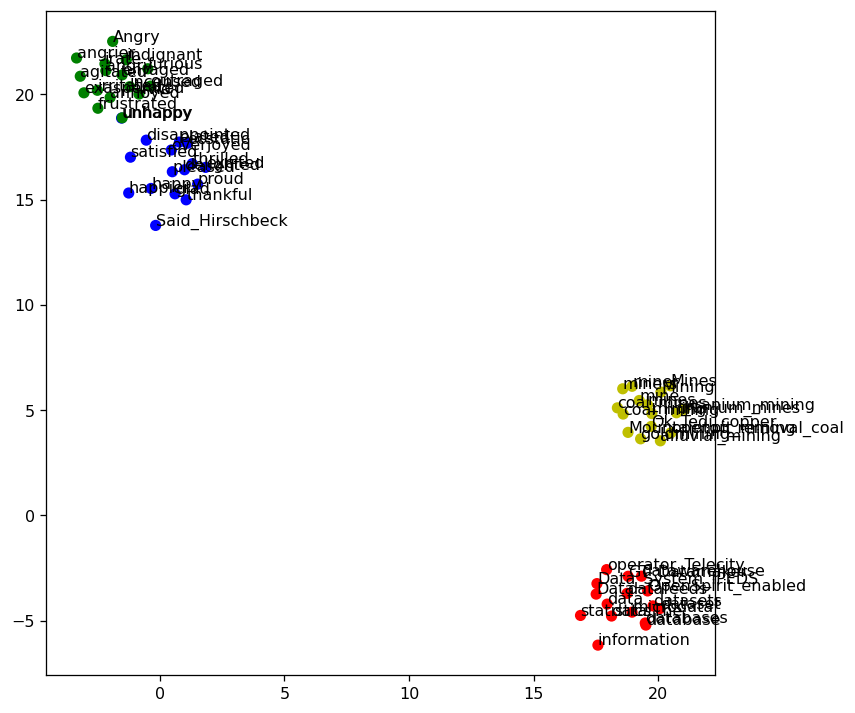

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()